In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
result_path = "/home/akira/Desktop/p-poteka/poteka-pipeline-pytorch/mlruns/1/d235a73bd0b54da096af8210a7f1a2f3/artifacts/evaluations/humidity/normal_evaluation/predict_result.csv"

result_df = pd.read_csv(result_path)
result_df.head()

,Unnamed: 0,LON,LAT,hour-rain,AT1,RH1,SOL,WD1,WS1,PRS,SLP,U-WIND,V-WIND,Pred_Value,test_case_name,date,predict_utc_time,target_parameter,time_step
0,Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,30.8,54.9,224.0,228.0,0.3,1005.1,1008.0,0.20074,0.22294,69.253334,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,humidity,0
1,NagNayon_00181273,121.0285,14.7192,0.0,32.5,52.1,441.0,332.0,0.4,1002.3,1008.5,-0.35318,0.18779,74.575005,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,humidity,0
2,DLSAU_00174722,120.9974,14.6705,0.0,31.9,51.8,526.0,18.0,0.2,1005.5,1008.0,-0.19021,-0.06180,75.585780,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,humidity,0
3,ASTI_00173457,121.0721,14.6471,0.0,31.8,49.2,146.0,131.0,0.3,1000.1,1007.7,0.19682,-0.22641,78.298900,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,humidity,0
4,MM-SanAndres_00173459,121.0061,14.5837,0.0,32.0,50.3,653.0,211.0,0.7,1006.2,1006.9,0.60002,0.36053,67.377390,TC_case_2020-10-12_5-0_start,2020-10-12,5-0,humidity,0


In [43]:
import sys
from sklearn.metrics import mean_squared_error, r2_score

sys.path.append("..")
from common.config import PPOTEKACols

class Evaluator:
    def __init__(self, result_df):
        self.result_df = result_df
        
    def calc_rmse(self, actual_ndarr: np.ndarray, target_ndarr: np.ndarray) -> float:
        return mean_squared_error(actual_ndarr, target_ndarr, squared=False)
    
    def calc_r2_score(self, actual_ndarr: np.ndarray, target_ndarr: np.ndarray) -> float:
        return r2_score(actual_ndarr, target_ndarr)
    
    def timeseries_rmse_plot(self, target_param: str):
        target_poteka_col = PPOTEKACols.get_col_from_weather_param(target_param)
        
        plot_df = pd.DataFrame(columns=["time_step", "test_case_name", "rmse"])
        for time_step, time_step_df in self.result_df.groupby("time_step"):
            for test_case_name, df in time_step_df.groupby("test_case_name"):
                rmse = self.rmse(df[target_poteka_col].astype(float).to_numpy(), df["Pred_Value"].astype(float).to_numpy())
                plot_df = pd.concat([plot_df, pd.DataFrame([{"time_step": time_step, "test_case_name": test_case_name, "rmse": rmse}])])
        
        plt.figure(figsize=(8, 6))
        ax = sns.boxplot(data=plot_df, x="time_step", y="rmse")
        plt.show()

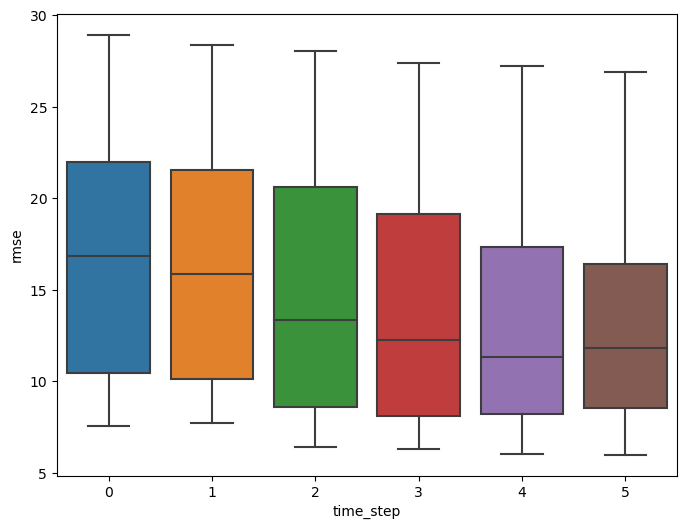

In [44]:
evaluator = Evaluator(result_df)
plot_df = evaluator.timeseries_rmse_plot("humidity")

In [45]:
plot_df.head()

,time_step,test_case_name,rmse
0,0,NOT_TC_case_2019-10-04_4-0_start,24.084679
0,0,NOT_TC_case_2019-10-04_4-20_start,24.435448
0,0,NOT_TC_case_2019-10-04_4-40_start,25.822195
0,0,NOT_TC_case_2019-10-04_5-0_start,26.370933
0,0,NOT_TC_case_2019-10-04_5-20_start,25.657658


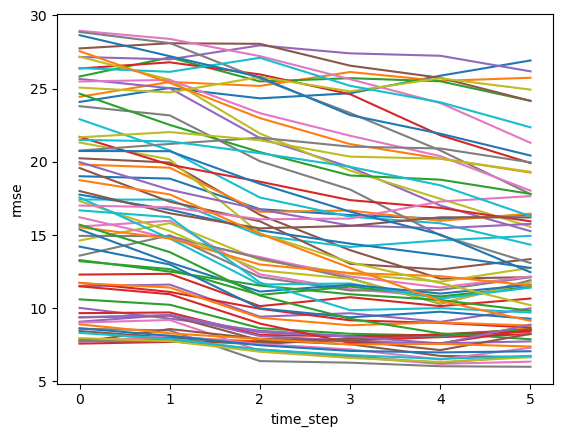

In [52]:
for test_case_name, df in plot_df.groupby("test_case_name"):
    df = df.reset_index()
    sns.lineplot(data=df, x="time_step", y="rmse")

In [51]:
df.head()

,time_step,test_case_name,rmse
0,0,NOT_TC_case_2019-10-04_4-0_start,24.084679
0,1,NOT_TC_case_2019-10-04_4-0_start,25.038123
0,2,NOT_TC_case_2019-10-04_4-0_start,24.330943
0,3,NOT_TC_case_2019-10-04_4-0_start,24.679357
0,4,NOT_TC_case_2019-10-04_4-0_start,25.878420


In [2]:
import numpy as np

arr = np.asarray([-1, 0, 1, 1.5])

arr = np.where(arr > 0, arr, 0)
print(arr)

[0.  0.  1.  1.5]


In [5]:
arr = np.where(arr > 1, 1, arr)
print(arr)

[0. 0. 1. 1.]
